In [4]:
import pandas as pd 
import json 
from dateutil import parser
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
# Load data
with open('logins.json') as f:
    data=json.load(f)

In [6]:
dates=data['login_time']
dates

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52',
 '1970-01-01 20:26:05',
 '1970-01-01 20:31:03',
 '1970-01-01 20:34:46',
 '1970-01-01 20:36:34',
 '1970-01-01 20:39:25',
 '1970-01-01 20:40:37',
 '1970-01-01 20:34:58',
 '1970-01-01 20:43:59',
 '1970-01-01 20:47:46',
 '1970-01-01 20:46:34',
 '1970-01-01 20:56:07',
 '1970-01-01 20:49:12',
 '1970-01-01 20:59:06',
 '1970-01-01 20:59:59',
 '1970-01-01 21:15:01',
 '1970-01-01 21:09:24',
 '1970-01-01 21:19:24',
 '1970-01-01 21:20:53',
 '1970-01-01 21:29:19',
 '1970-01-01 21:58:05',
 '1970-01-01 21:51:51',
 '1970-01-01 21:59:40',
 '1970-01-01 22:08:34',
 '1970-01-01 22:02:51',
 '1970-01-01 21:58:32',
 '1970-01-01 22:02:31',
 '1970-01-01 22:05:32',
 '1970-01-01 22:02:46',
 '1970-01-01 22:10:28',
 '1970-01-01 22:11:58',
 '1970-01-01 22:01:05',
 '1970-01-01 22:

In [7]:
dates = pd.DataFrame([parser.parse(date) for date in dates])

In [8]:
dates=dates.sort_values(by=0,ascending=True)

In [9]:
dates=dates.reset_index(drop=True)

In [10]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
0    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [11]:
# Generate 15 mins time interval 
start_time=dates[0][0]
end_time=dates[0][93141]
time_interval=[start_time]
while start_time <= end_time:
    start_time=start_time+timedelta(minutes=15)
    time_interval.append(start_time)

In [12]:
# Change data type for comparison
compare_time=[]
for i in dates[0]:
    compare_time.append(pd.Timestamp(i))

In [13]:
# Count cumulative logins
counts=[]
for i in range(len(time_interval)):
    count=0
    for j in range(len(compare_time)):
        if compare_time[j] <= time_interval[i]:
            count+=1
    counts.append(count)

In [14]:
# Count logins between each time interval
logins=[1]
for i in range(1,len(counts)):
    logins.append(counts[i]-counts[i-1])

In [15]:
# Create dataframe 
df={'time_interval':time_interval,'logins':logins}
df=pd.DataFrame(df)

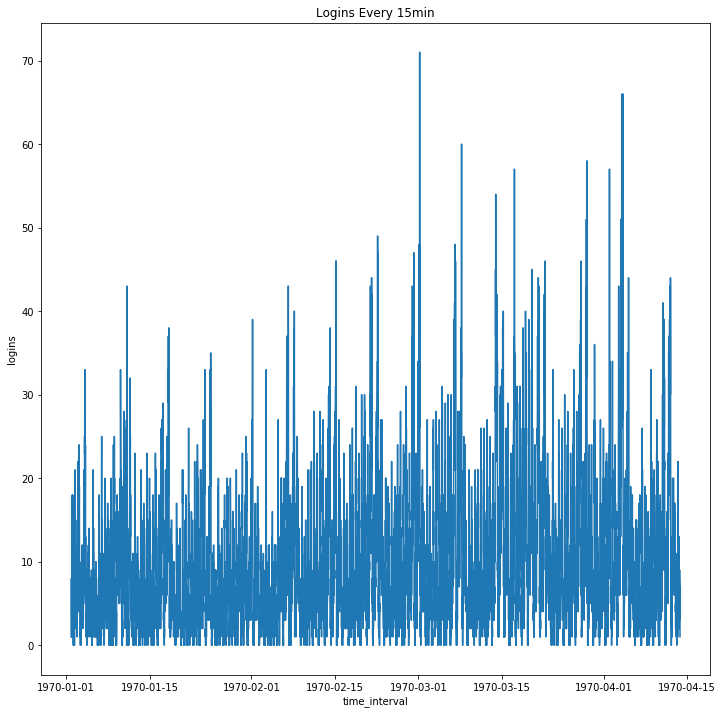

In [21]:
# Plot graph
plt.figure(figsize=(12,12))
plt.title('Logins Every 15min')
sns.lineplot(x='time_interval',y='logins',data=df)

In [127]:
df['logins'].describe()

count    9789.000000
mean        9.514966
std         8.353849
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        71.000000
Name: logins, dtype: float64

In [75]:
# Find the pattern for each day of peak logins
peak=df[df['logins']>30].reset_index(drop=True)

,time_interval,logins
0,1970-01-04 02:42:16,33
1,1970-01-10 02:12:16,33
2,1970-01-11 04:57:16,43
3,1970-01-11 16:57:16,32
4,1970-01-18 02:27:16,37
...,...,...
276,1970-04-12 03:57:16,38
277,1970-04-12 04:12:16,43
278,1970-04-12 04:27:16,34
279,1970-04-12 04:57:16,44


In [78]:
peak['only_time']=[d.time() for d in peak['time_interval']]

In [86]:
midnight=datetime.strptime("00:00", '%H:%M').time()
morning=datetime.strptime("06:00", '%H:%M').time()
afternoon=datetime.strptime("12:00", '%H:%M').time()
night=datetime.strptime("18:00", '%H:%M').time()
late_night=datetime.strptime("23:59:59", '%H:%M:%S').time()

In [87]:
time_of_day=[]
for i in range(len(peak)):
    if midnight<=peak['only_time'][i]<=morning:
        time_of_day.append("early_morning")
    if morning<peak['only_time'][i]<=afternoon:
        time_of_day.append("morning")
    if afternoon<peak['only_time'][i]<=night:
        time_of_day.append("afternoon")
    if night<=peak['only_time'][i]<=late_night:
        time_of_day.append("night")

In [92]:
peak['time_of_day']=time_of_day

In [120]:
time_stage=peak['time_of_day'].value_counts().rename_axis('time_of_day').reset_index(name='counts')

Text(0.5, 1.0, 'Frequncy Count of Peak Logins at Different Time of the Day')

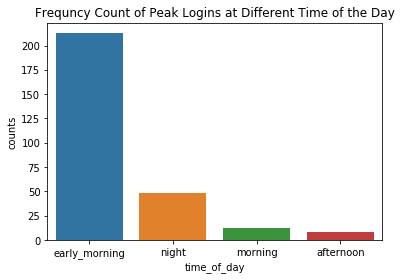

In [124]:
sns.barplot(x='time_of_day',y='counts',data=time_stage)
plt.title('Frequncy Count of Peak Logins at Different Time of the Day')